In [186]:
import pandas as pd
from bokeh.io import output_file, show, output_notebook, reset_output
from bokeh.plotting import figure

import networkx as nx
from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool,)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx
from bokeh.layouts import gridplot
from scipy.stats import chi2_contingency

In [187]:
reset_output()
output_notebook()

Loading BokehJS ...

In [188]:
SAMPLES_CSV = "./data/discrete/samples.csv"
GROUND_TRUTH_GML = "./data/discrete/ground_truth.gml"

In [189]:
df = pd.read_csv(SAMPLES_CSV)
df = df.reindex(sorted(df.columns), axis=1)
df.head()

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,1
3,0,0,0,0,0
4,0,0,0,0,0


In [190]:
# Prepare Data
G = nx.read_gml(GROUND_TRUTH_GML)


#for start_node, end_node, _ in G.edges(data=True):
#    edge_color = SAME_CLUB_COLOR if G.nodes[start_node]["club"] == G.nodes[end_node]["club"] else DIFFERENT_CLUB_COLOR
#    edge_attrs[(start_node, end_node)] = edge_color

#nx.set_edge_attributes(G, edge_attrs, "edge_color")

# Show with Bokeh
plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Graph Interaction Demonstration"

node_hover_tool = HoverTool(tooltips=[("index", "@index"), ("club", "@club")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
#graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.8, line_width=1)
plot.renderers.append(graph_renderer)
show(plot, handle_notebook=True)

In [191]:
plots = []
for column in df.columns:
    discrete_values = df[column].unique()
    counts = list(df[column].value_counts())

    p = figure(x_range=discrete_values, plot_height=250, title=f"Node: {column}",
               toolbar_location=None, tools="")

    p.vbar(x=discrete_values, top=counts, width=0.9)

    p.xgrid.grid_line_color = None
    p.y_range.start = 0

    plots.append(p)
    
# make a grid
grid = gridplot(plots, ncols=len(df.columns), plot_width=250, plot_height=250)

show(grid)

In [192]:
from bokeh.charts import HeatMap, bins, output_file, show, vplot

hm = figure(title="Categorical Heatmap", tools="hover", toolbar_location=None, x_range=list(df.columns), y_range=list(df.columns))

hm.rect(df.columns, df.columns, width=1, height=1, )
show(hm)

ModuleNotFoundError: No module named 'bokeh.charts'

In [193]:
from bokeh.charts import HeatMap
from bokeh.sampledata.autompg import autompg
hm1 = HeatMap(autompg, x=bins('mpg'), y=bins('displ'))
show(hm1)bokeh.plotting

SyntaxError: invalid syntax (<ipython-input-193-c624e984f5b1>, line 4)

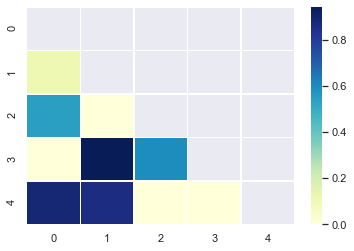

In [194]:
import numpy as np
import seaborn as sns

num_values = len(df.columns)

mask = np.ones([num_values, num_values])

true_values = np.zeros([num_values, num_values])
for edge in G.edges:
    x = int(edge[0])
    y = int(edge[1])
    true_values[x][y] = 1
    true_values[y][x] = 1
    
p_values = []
for column_index, column in enumerate(df.columns):
    row_p_values = []
    for row_index, row in enumerate(df.columns):
        
        ct = pd.crosstab(df[column], df[row])
        stat, p_value, degrees_of_freedom, expected = chi2_contingency(ct)
        row_p_values.append(p_value)
        
        if column_index > row_index:
            mask[column_index, row_index] = False
        
    p_values.append(row_p_values)
    
p_values = np.array(p_values)
hm_data =  p_values 
ax = sns.heatmap(
    hm_data,
    xticklabels=df.columns,
    yticklabels=df.columns,
    mask=mask,
    linewidths=.5,
    cmap="YlGnBu"
)

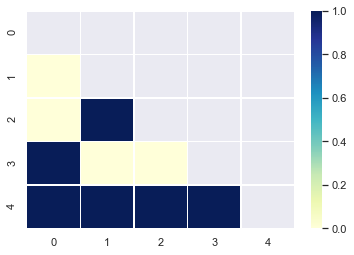

In [195]:
#sns.set_palette(reversed(sns.color_palette("YlGnBu", 1)), 1)
ax = sns.heatmap(true_values,xticklabels=df.columns, yticklabels=df.columns, mask=mask, linewidths=.5, cmap="YlGnBu")


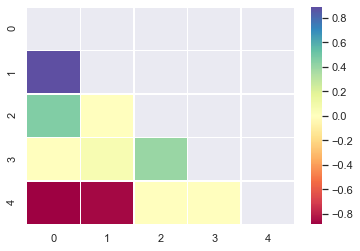

In [198]:
flip_bool = lambda t: not t
vfunc = np.vectorize(flip_bool)
flipped_true_values = vfunc(true_values)

hm_data =  flipped_true_values - p_values 
ax = sns.heatmap(
    hm_data,
    xticklabels=df.columns,
    yticklabels=df.columns,
    mask=mask,
    linewidths=.5,
    cmap="Spectral"
)

In [181]:
#red --> hat ne edge vergessen
#gelb --> hat edge korrekt vorhergesagt
#blau --> hat edge vorausgesagt, ist aber keine da

True

array([[ True,  True,  True, False, False],
       [ True,  True, False,  True, False],
       [ True, False,  True,  True, False],
       [False,  True,  True,  True, False],
       [False, False, False, False,  True]])

In [185]:
true_values

False